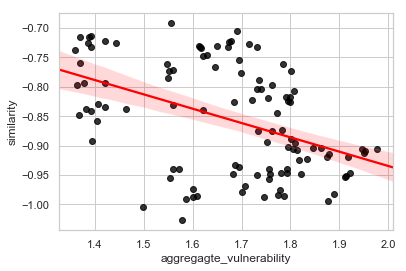

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns 


t=pd.read_csv('/Users/admin/git_repos/BlackRhino/examples/firesale2020/distances_top10-timeseries_getindex.csv')

x = np.log(t['aggregagte_vulnerability']*-1 *100)
y = np.log(t["similarity"])
 



ax = sns.regplot(x=x, y=y, data=t,
                scatter_kws={"color": "black"}, line_kws={"color": "red"}) 



Text(22.96,0.5,'Similarity (Euclidean distance)')

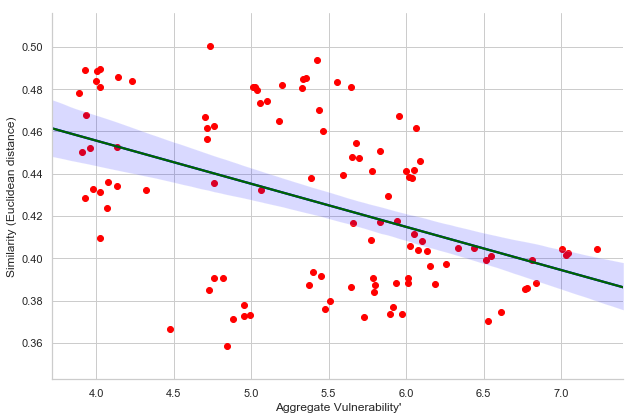

In [24]:
import pandas 
 
import seaborn
import matplotlib.pyplot as plt 

plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20

t=pd.read_csv('/Users/admin/git_repos/BlackRhino/examples/firesale2020/distances_top10-timeseries_getindex.csv')

d = pandas.DataFrame({'x':x, 'y': y})

seaborn.set(style = 'whitegrid')
p = seaborn.FacetGrid(d, size = 6, aspect = 1.5) 
axes = p.axes.flatten()

p.map(plt.scatter, 'x', 'y', color = 'red')
p.map(seaborn.regplot, 'x', 'y', scatter = False, ci = 95, 
    fit_reg = True, color = 'blue') 
p.map(seaborn.regplot, 'x', 'y', scatter = False, ci = 0, 
    fit_reg = True, color = 'darkgreen')

axes[0].set_xlabel("Aggregate Vulnerability'")
axes[0].set_ylabel("Similarity (Euclidean distance)")
# p.set(xlim = (2, 9)) 
# p.set(ylim = (2, 17)) 
 
# p.savefig('xy-regression-ci.pdf', bbox_inches='tight')

UnboundLocalError: local variable 'scatter_kws' referenced before assignment

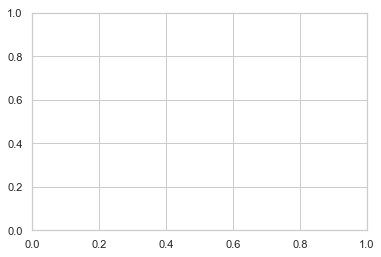

In [32]:
def regplot(*args, **kwargs):
    # this is the class that `sns.regplot` uses
    plotter = sns.regression._RegressionPlotter(*args, **kwargs)

    # this is essentially the code from `sns.regplot`
    ax = kwargs.get("ax", None)
    if ax is None:
        ax = plt.gca()

    scatter_kws = {} if scatter_kws is None else copy.copy(scatter_kws)
    scatter_kws["marker"] = marker
    line_kws = {} if line_kws is None else copy.copy(line_kws)

    plotter.plot(ax, scatter_kws, line_kws)

    # unfortunately the regression results aren't stored, so we rerun
    grid, yhat, err_bands = plotter.fit_regression(plt.gca())

    # also unfortunately, this doesn't return the parameters, so we infer them
    slope = (yhat[-1] - yhat[0]) / (grid[-1] - grid[0])
    intercept = yhat[0] - slope * grid[0]
    return slope, intercept


slope, intercept  = regplot(x=x, y=y, data=t)

Text(22.96,0.5,'Similarity (Euclidean distance)')

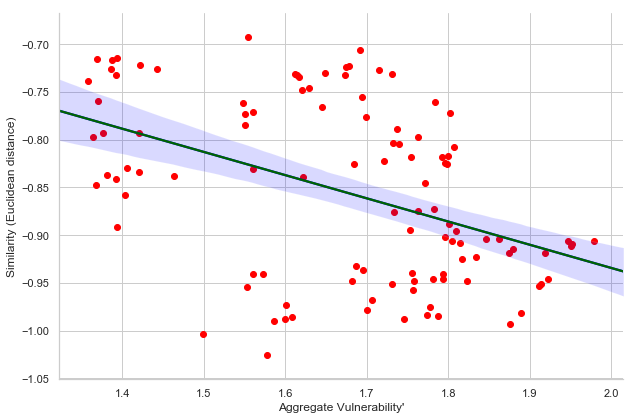

In [40]:
import pandas 
import numpy as np
import seaborn
import matplotlib.pyplot as plt 

plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20

t=pd.read_csv('/Users/admin/git_repos/BlackRhino/examples/firesale2020/distances_top10-timeseries_getindex.csv')

x = np.log(t['aggregagte_vulnerability']*-1 *100)
y = np.log(t["similarity"])
 


d = pandas.DataFrame({'x':x, 'y': y})

seaborn.set(style = 'whitegrid')
p = seaborn.FacetGrid(d, size = 6, aspect = 1.5) 
axes = p.axes.flatten()

p.map(plt.scatter, 'x', 'y', color = 'red')
p.map(seaborn.regplot, 'x', 'y', scatter = False, ci = 95, 
    fit_reg = True, color = 'blue') 
p.map(seaborn.regplot, 'x', 'y', scatter = False, ci = 0, 
    fit_reg = True, color = 'darkgreen')

axes[0].set_xlabel("Aggregate Vulnerability'")
axes[0].set_ylabel("Similarity (Euclidean distance)")
# p.set(xlim = (2, 9)) 
# p.set(ylim = (2, 17)) 
 

In [38]:
import numpy as np
import statsmodels.api as sm

import statsmodels.formula.api as smf
smod = smf.ols(formula ='y~ x', data=t)
result = smod.fit()
print(result.summary())
      

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     27.31
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           8.73e-07
Time:                        15:09:51   Log-Likelihood:                 209.07
No. Observations:                 108   AIC:                            -414.1
Df Residuals:                     106   BIC:                            -408.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5372      0.021     25.180      0.0